# Module-4: Data Processing for Timeseries Forecasting	


# A- Overview of the Section




# 1-Dataset Significance


2. Famous platforms for authenticated datasets

    1. <a href="https://www.kaggle.com/datasets">Kaggle</a>
    
    2. <a href="https://github.com/A-I-Studio/Datasets">Github</a>
    
    3. <a href="https://huggingface.co/datasets">Hugging Face</a>
    
    4. <a href="https://www.worlddata.info/">Data World</a>
    

So now lets start working on our dataset

# 2-Overview of the Dataset

**1. Import Libraries**


In [1]:
import pandas as pd
import numpy as np
air_pollution = pd.read_csv('air_pollution.csv', parse_dates=['date'])

air_pollution.set_index('date', inplace=True)

air_pollution

pollution_today        dew
date                                  
2010-01-02       145.958333  -8.500000
2010-01-03        78.833333 -10.125000
2010-01-04        31.333333 -20.875000
2010-01-05        42.458333 -24.583333
2010-01-06        56.416667 -23.708333
...                     ...        ...
2014-12-27       238.666667  -9.666667
2014-12-28       197.375000 -10.791667
2014-12-29       159.000000 -12.333333
2014-12-30        46.083333 -13.916667
2014-12-31        10.041667 -21.791667

[1825 rows x 2 columns]

In [2]:
air_pollution.head(3)

pollution_today     dew
date                               
2010-01-02       145.958333  -8.500
2010-01-03        78.833333 -10.125
2010-01-04        31.333333 -20.875

In [12]:
air_pollution.tail(3)

pollution_today        dew
date                                  
2014-12-29       159.000000 -12.333333
2014-12-30        46.083333 -13.916667
2014-12-31        10.041667 -21.791667

# 3- Manipulation in the Dataset

**1. Lets have the overview of our dataset here**

In [13]:
air_pollution.columns

Index(['pollution_today', 'dew'], dtype='object')

**Lets Checkout the details about the dataset**

In [14]:
air_pollution.describe()

pollution_today          dew
count      1825.000000  1825.000000
mean         98.245080     1.828516
std          76.807697    14.163508
min           3.166667   -33.333333
25%          42.333333   -10.083333
50%          79.166667     2.041667
75%         131.166667    15.083333
max         541.895833    26.208333

# 4- Data Preprocessing

Lets check each feature values


In [2]:
from matplotlib import pyplot as plt

In [16]:
# values = air_pollution.values

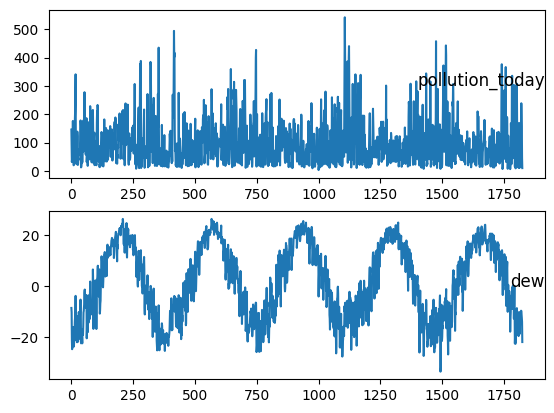

In [3]:
for i in range(air_pollution.shape[1]):
    plt.subplot(air_pollution.shape[1], 1, i+1)
    plt.plot(air_pollution.values[:,i])
    plt.title(air_pollution.columns[i], y=0.5, loc="right")

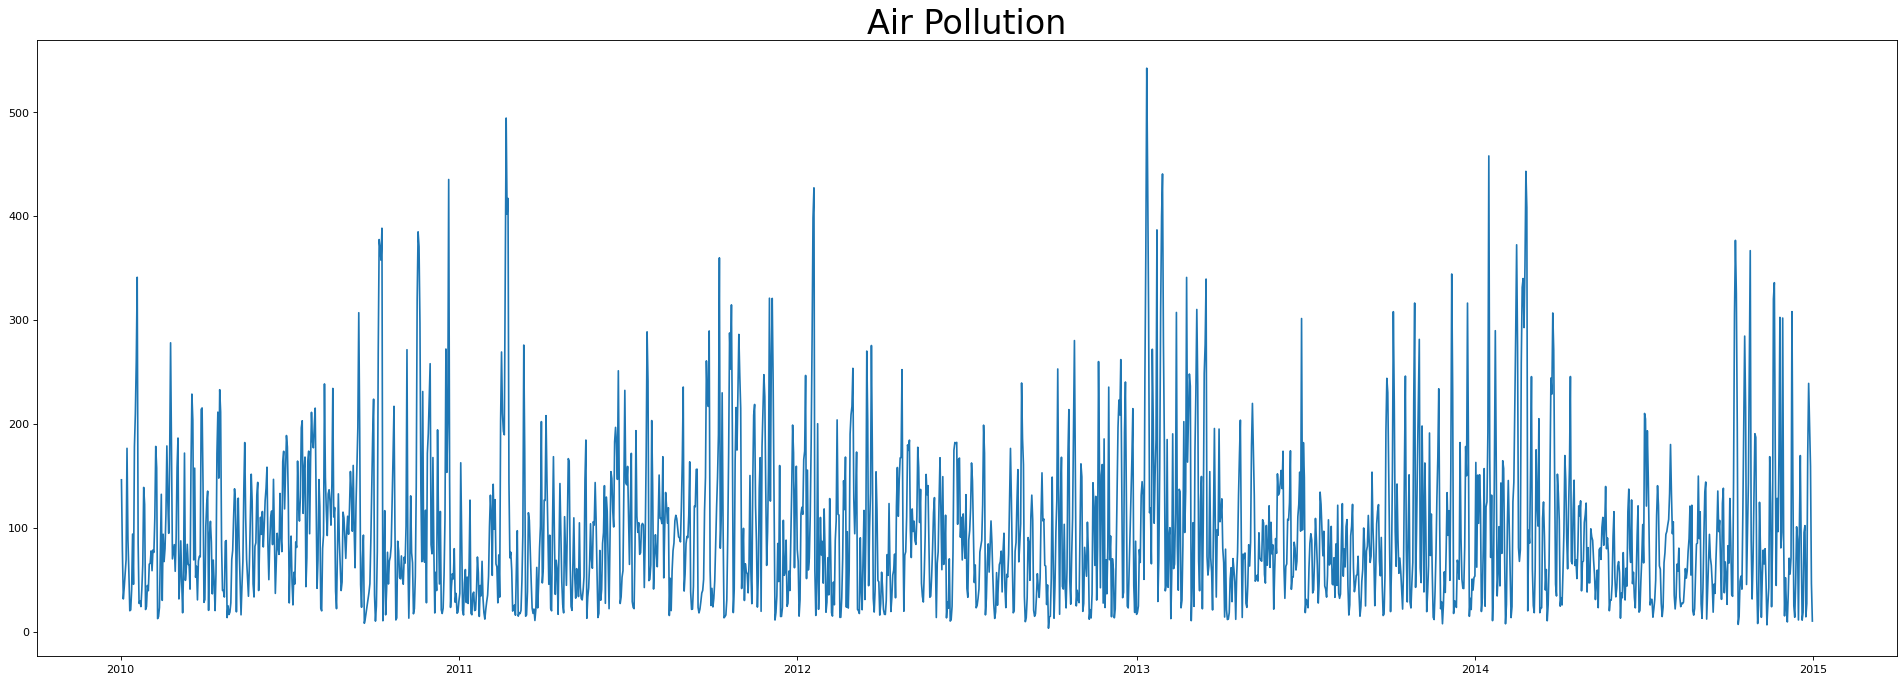

In [4]:
plt.figure(num=None, figsize=(30,10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Air Pollution', fontsize=30)
plt.plot(air_pollution.pollution_today)
plt.show()

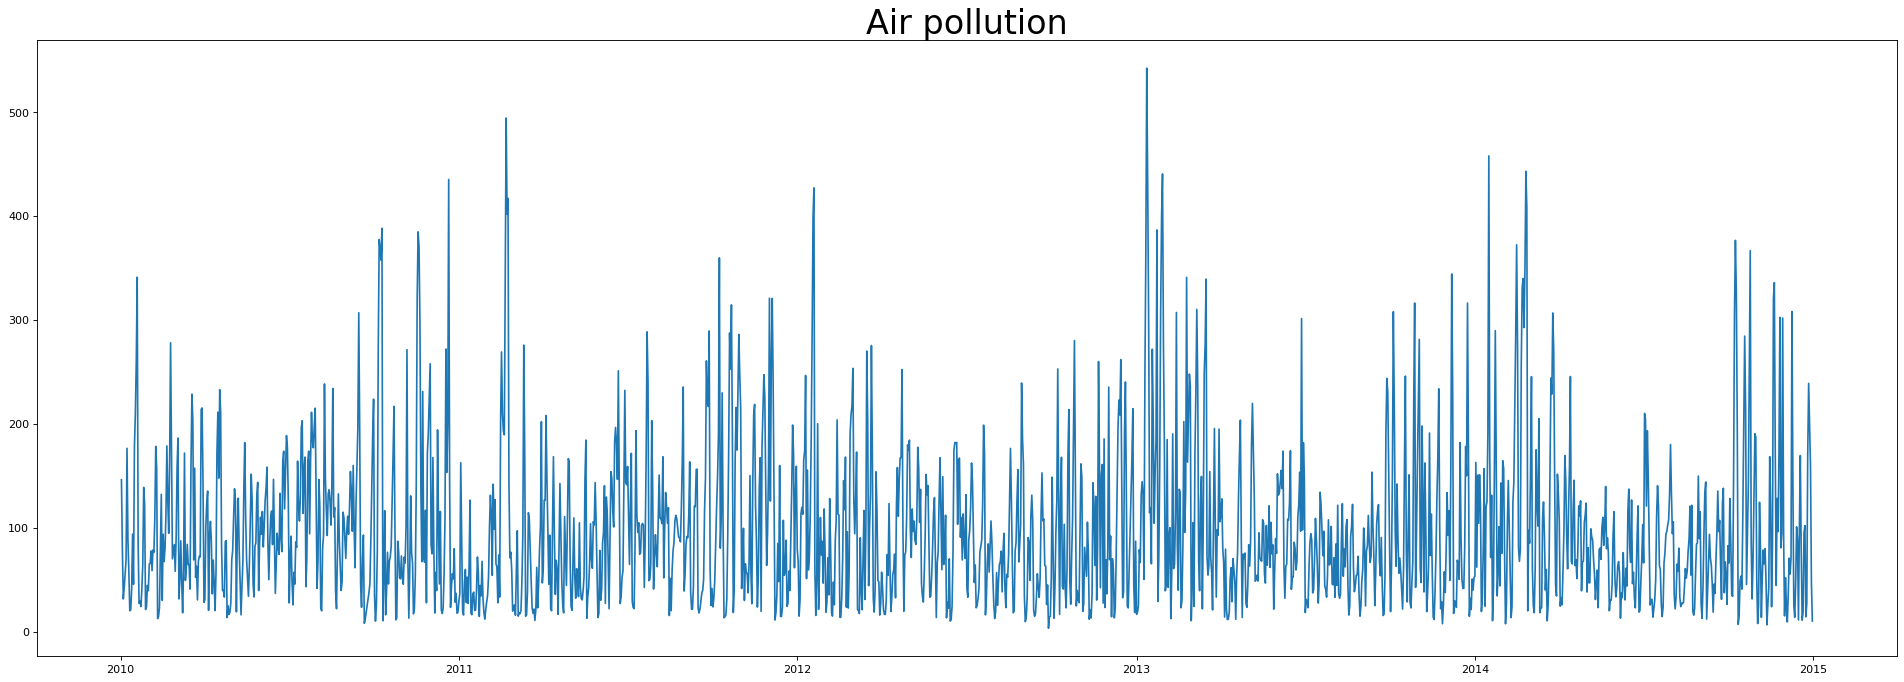

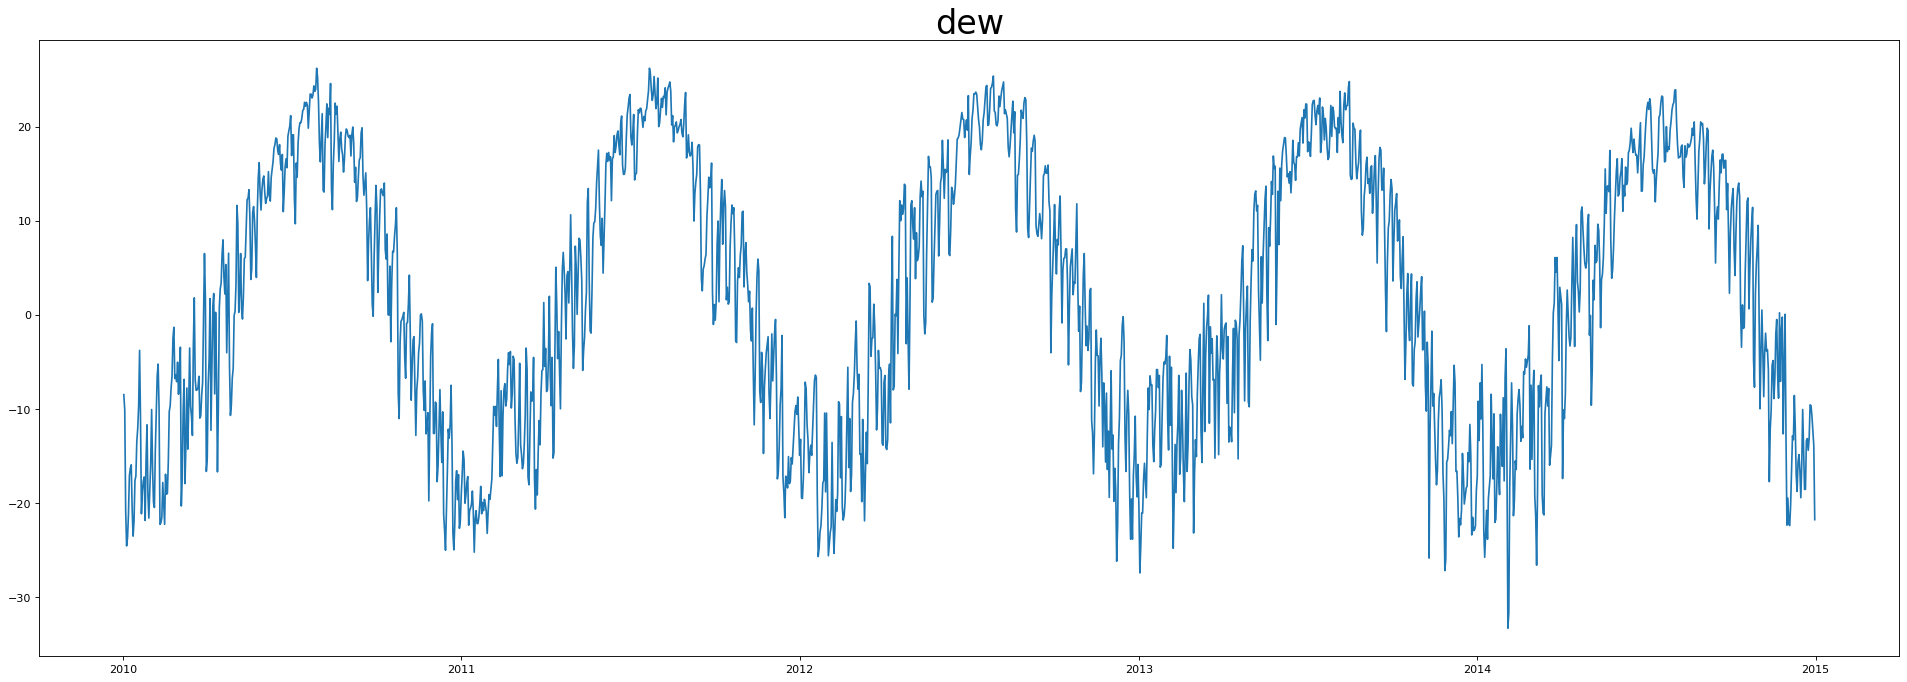

In [5]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Air pollution', fontsize=30)
plt.plot(air_pollution.pollution_today)

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('dew', fontsize=30)
plt.plot(air_pollution.dew)

# 7. RVT Models in Time Series in Python
The Concept of Resampling, Visualize and Transform

# Automatic time series decomposition

**Lets Define few libraries which we will be using in Automatic Time Series Decomposition

In [20]:
# import tensorflow as tf
# import statsmodels as sm
# from statsmodels.tsa.seasonal import seasonal_decompose

# import warnings
# warnings.filterwarnings("ignore")

# seed = 42

# tf.random.set_seed(seed)
# np.random.seed(seed)


# plt.style.use('bmh')

# from pylab import rcParams
# import matplotlib as mpl

# mpl.rcParams['axes.labelsize']=14
# mpl.rcParams['xtick.labelsize']=12
# mpl.rcParams['ytick.labelsize']=12
# mpl.rcParams['text.color']='k'

# rcParams['figure.figsize']=18, 8

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

Additive model is used when the variance of the time series doesn't change over different values of the time series.

On the other hand, if the variance is higher when the time series is higher then it often means we should use a multiplicative models.

https://datascience.stackexchange.com/questions/46050/additive-vs-multiplicative-model-in-time-series-data#:~:text=Explanation%3A,should%20use%20a%20multiplicative%20models.

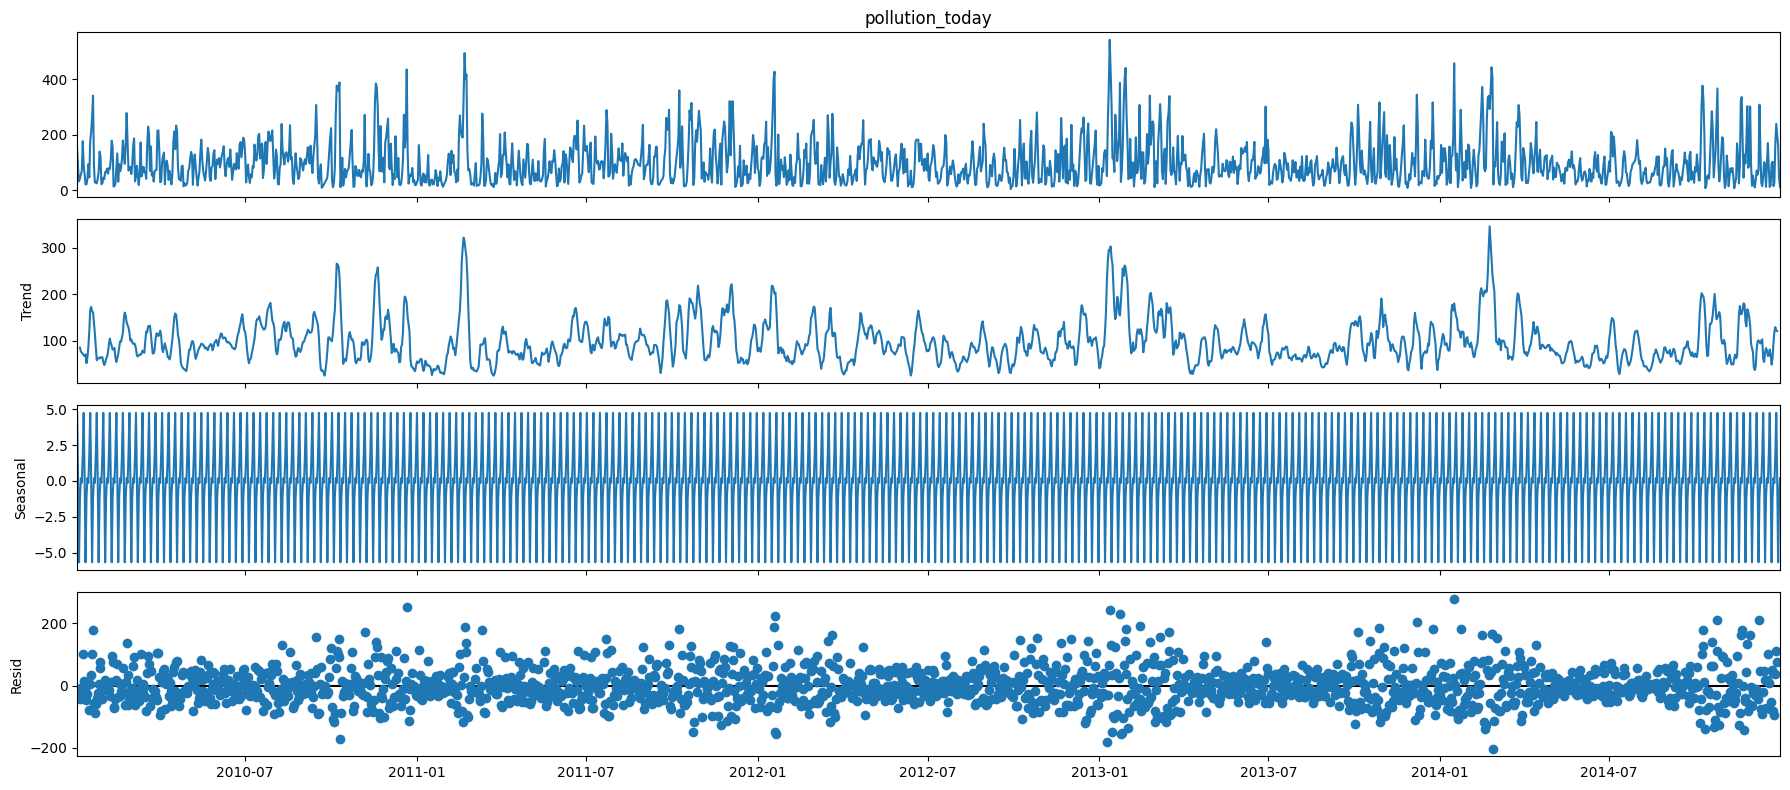

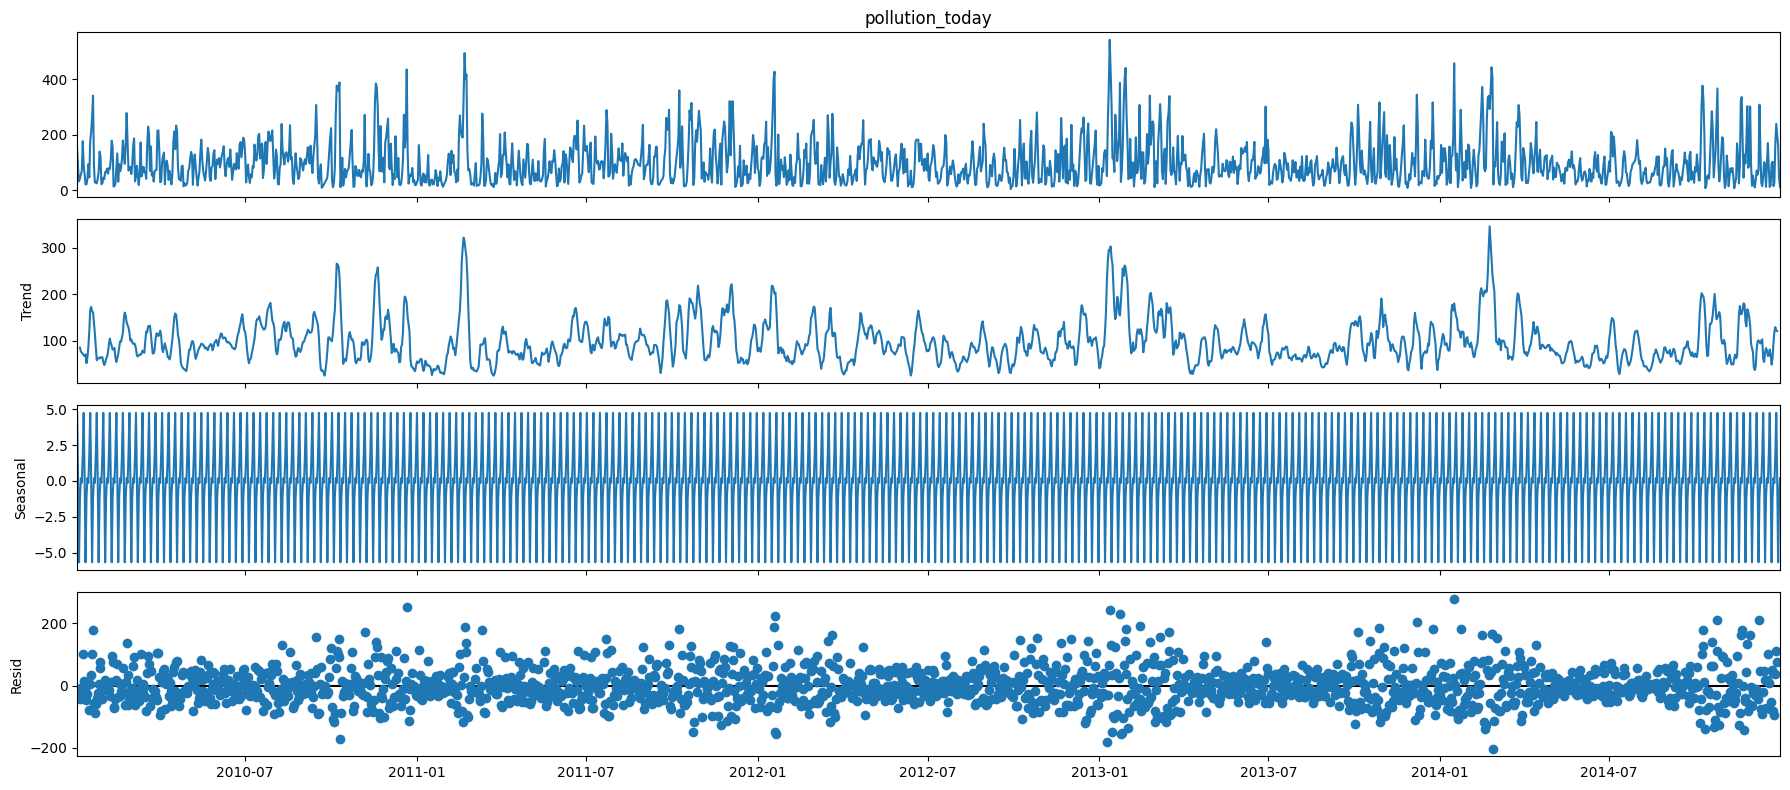

In [18]:
seasonal_decompose(air_pollution.pollution_today, model='additive').plot()

Nel modello additivo vediamo che c'è molta varianza nei residui. Proviamo quindi il modello moltiplicativo (va meglio)

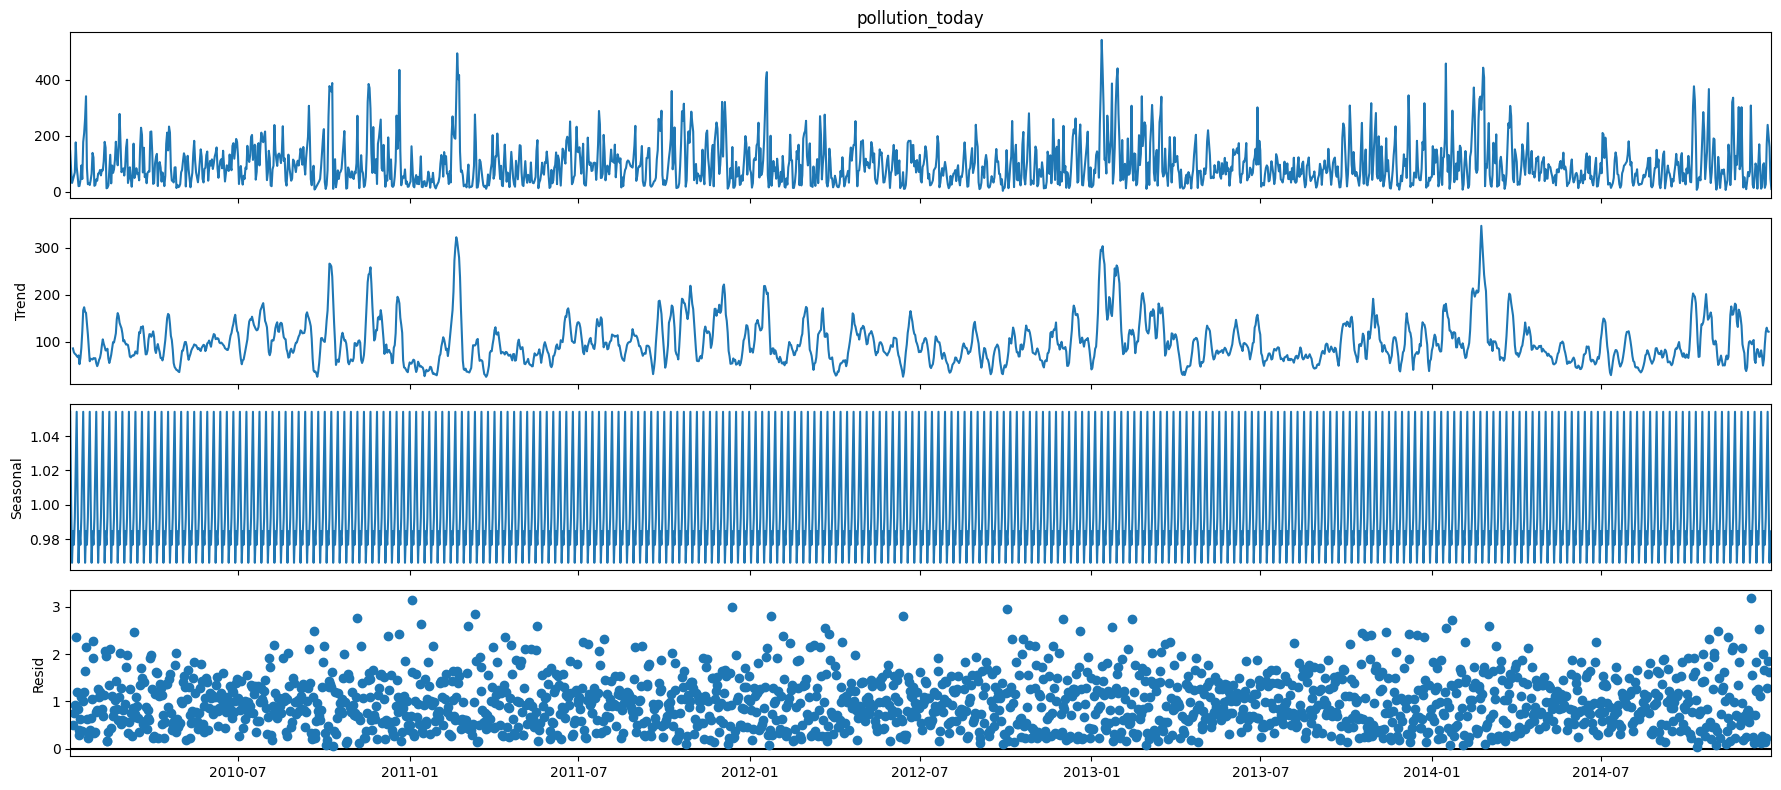

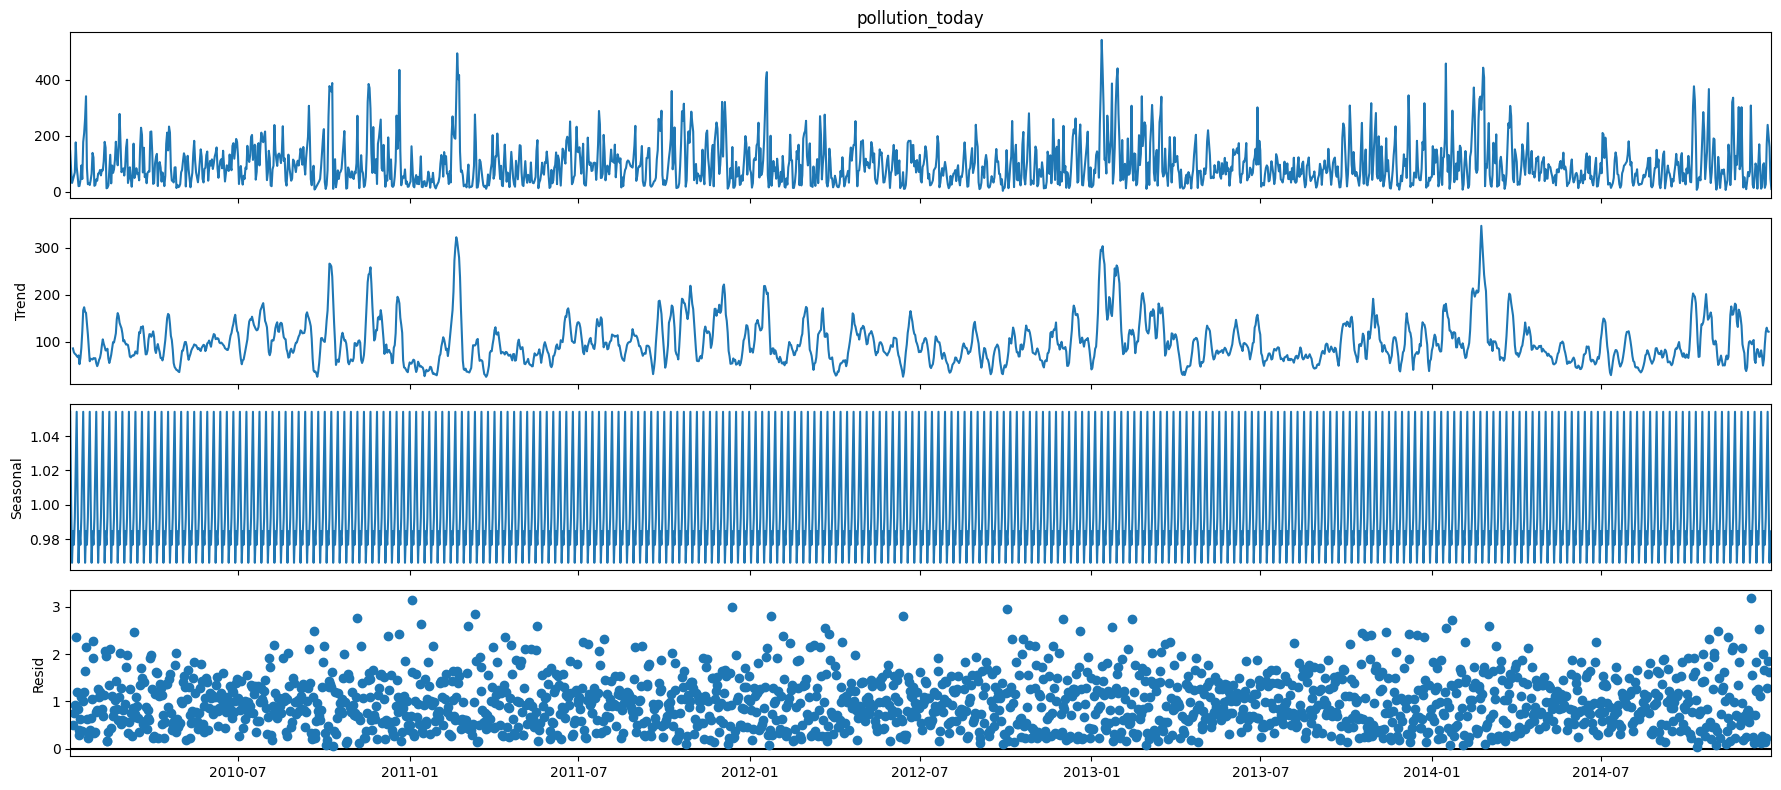

In [19]:
result = seasonal_decompose(air_pollution.pollution_today, model='multiplicative')
result.plot()

# Trend  in Automatic Time Series Decomposition using Moving Average Filter 

In [8]:
from sklearn.linear_model import LinearRegression

Come X usa semplicemente un numero incrementale

In [9]:
X = [i for i in range(0, len(air_pollution.pollution_today))]
X = np.reshape(X, (len(X), 1)) 
y = air_pollution.pollution_today.values

X, y

(array([[   0],
        [   1],
        [   2],
        ...,
        [1822],
        [1823],
        [1824]]),
 array([145.9583333 ,  78.83333333,  31.33333333, ..., 159.        ,
         46.08333333,  10.04166667]))

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Perché predice la X stessa su cui ha allenato????

In [11]:
trend = model.predict(X)
trend

array([100.11456703, 100.11251715, 100.11046728, ...,  96.37969254,
        96.37764266,  96.37559279])

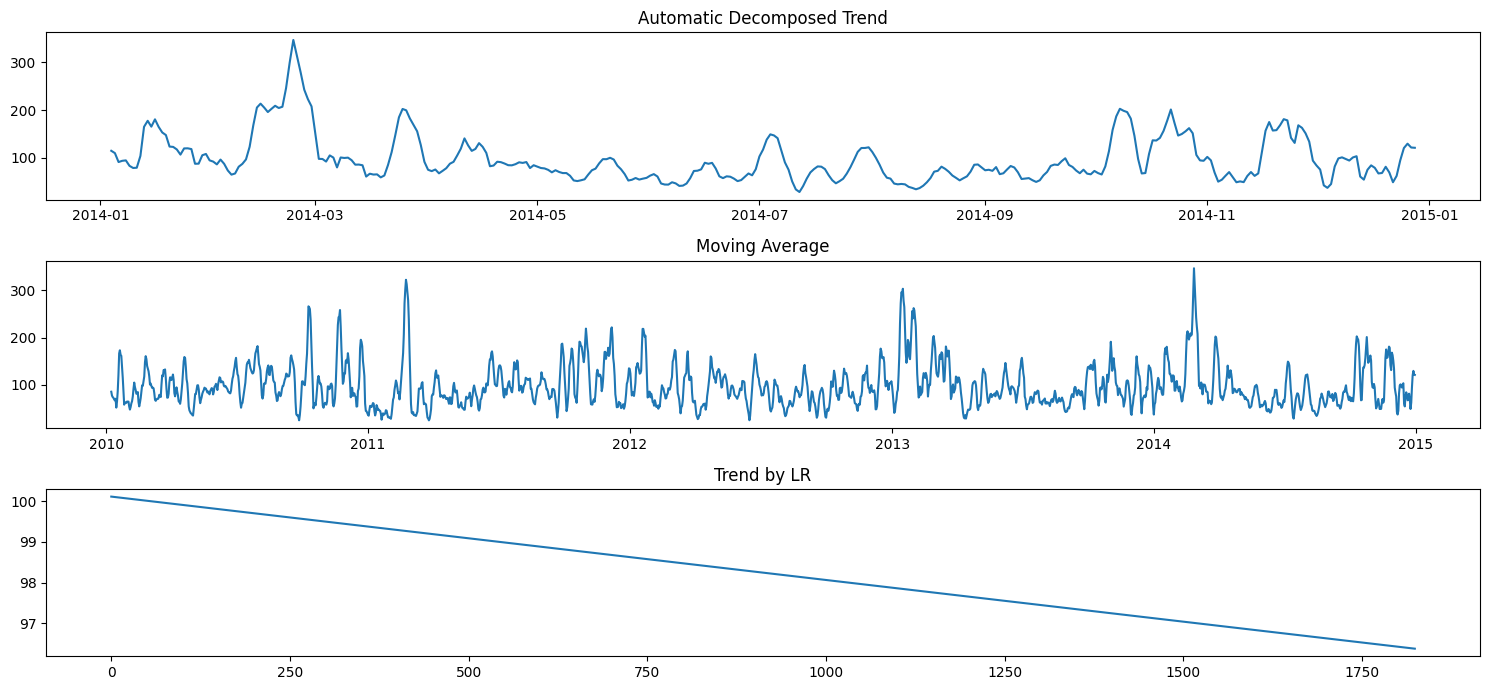

In [39]:
fig = plt.figure(figsize=(15,7))
layout=(3,1)
pm_ax = plt.subplot2grid(layout,(0,0), colspan=2)
mv_ax = plt.subplot2grid(layout,(1,0), colspan=2)
fit_ax = plt.subplot2grid(layout,(2,0), colspan=2)

pm_ax.plot(result.trend)
pm_ax.set_title("Automatic Decomposed Trend")

mm = air_pollution.pollution_today.rolling(7).mean()
mv_ax.plot(mm)
mv_ax.set_title("Moving Average")

fit_ax.plot(trend)
fit_ax.set_title("Trend by LR")

plt.tight_layout()
plt.show()

# Seasonality in Automatic Time Series Decomposition 

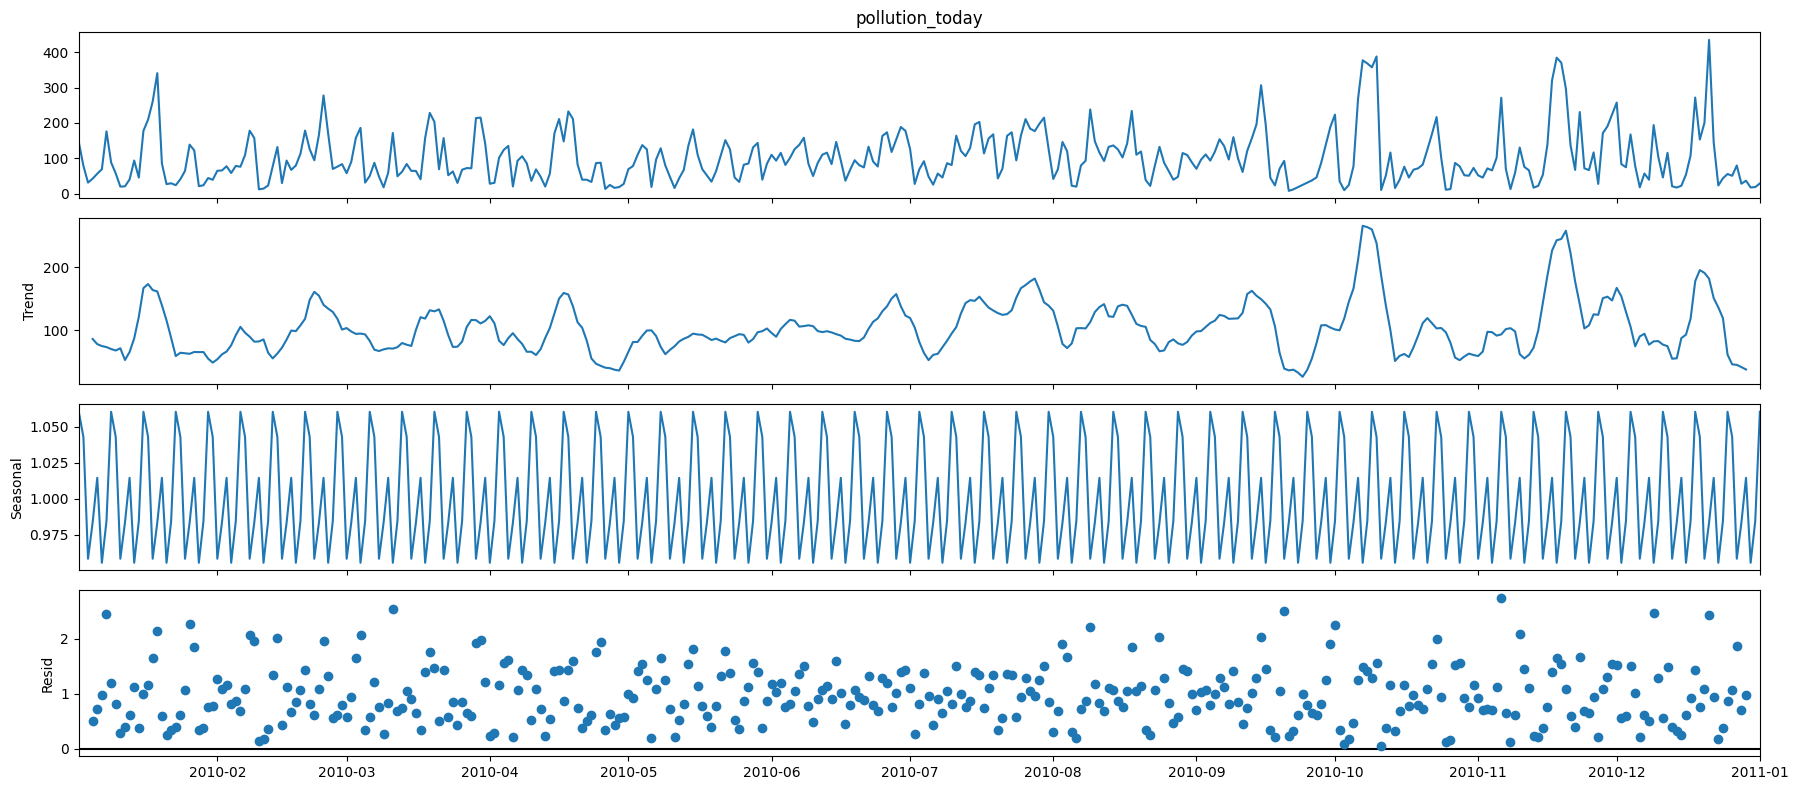

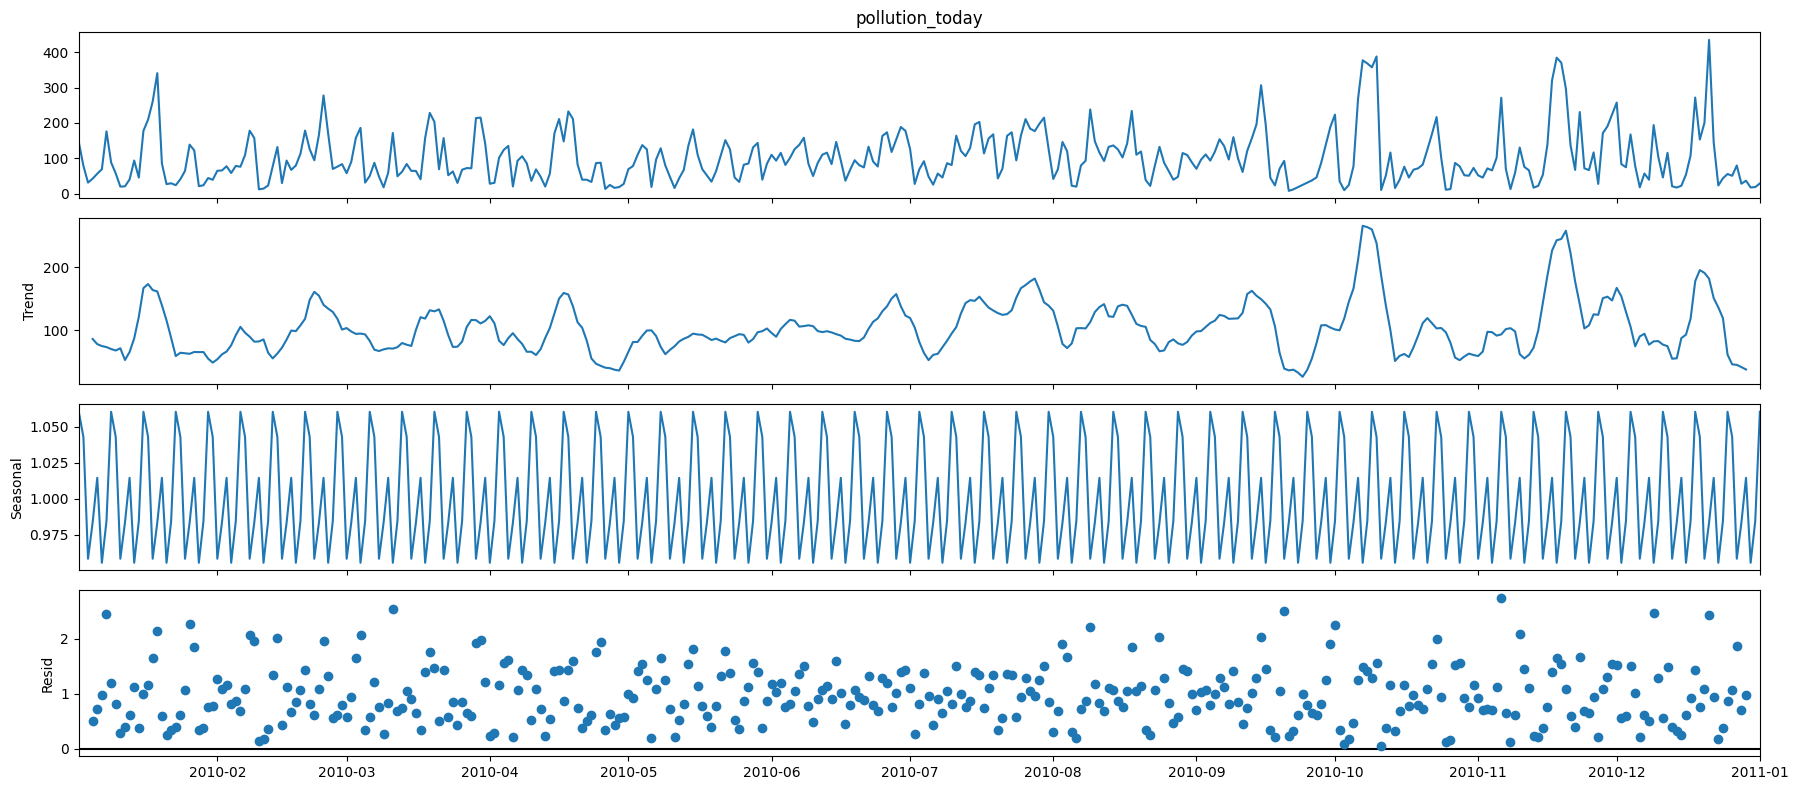

In [28]:
series = air_pollution.pollution_today[:365]

result = seasonal_decompose(series, model='multiplicative')
result.plot()

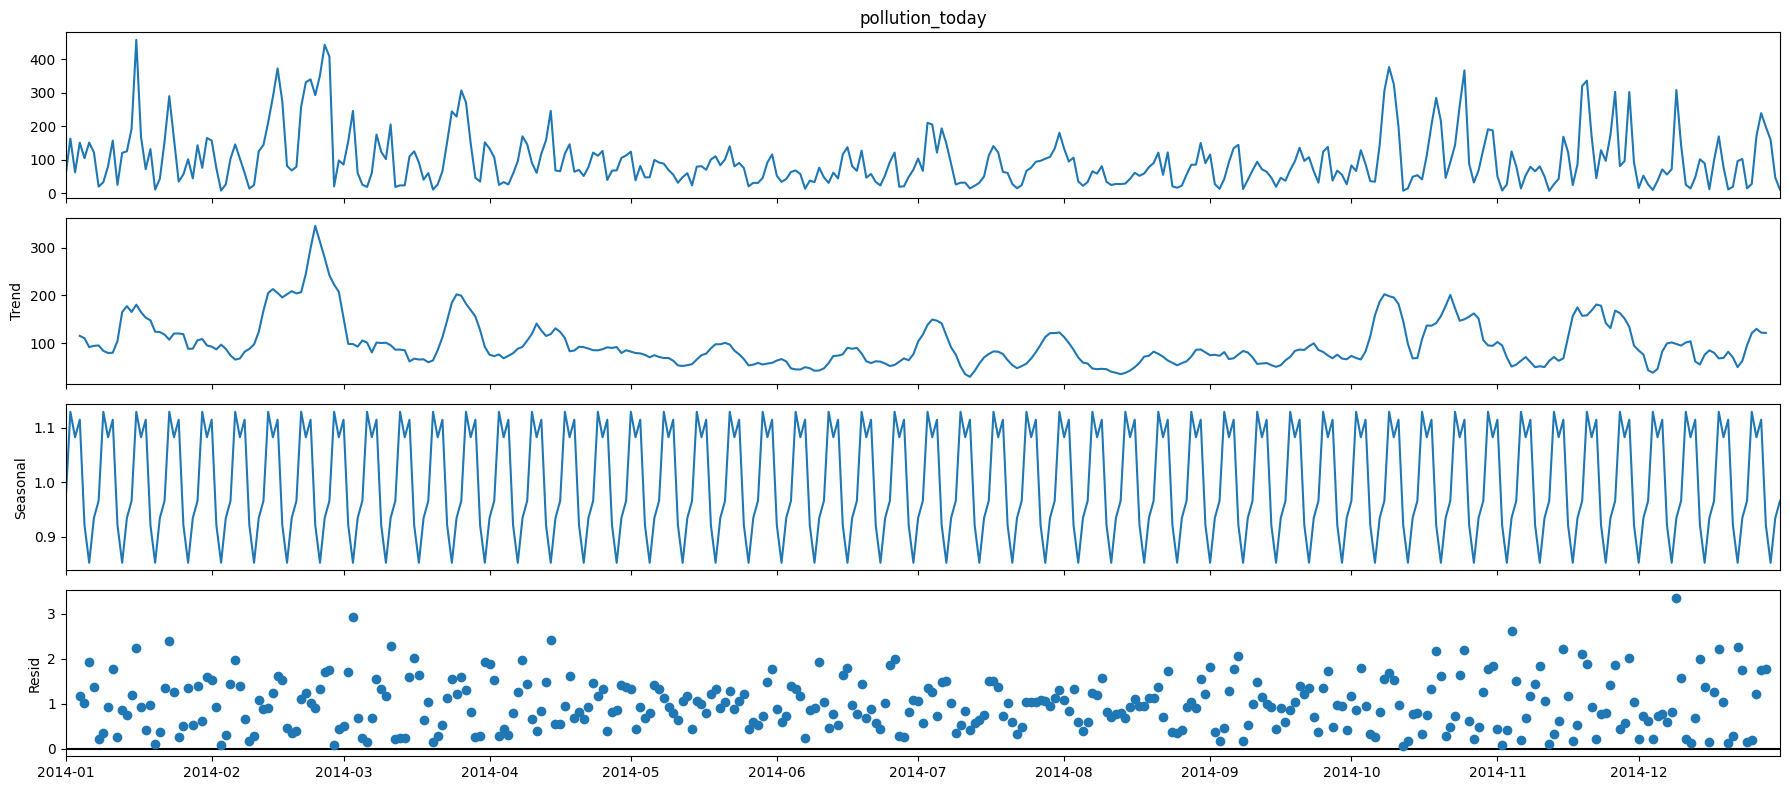

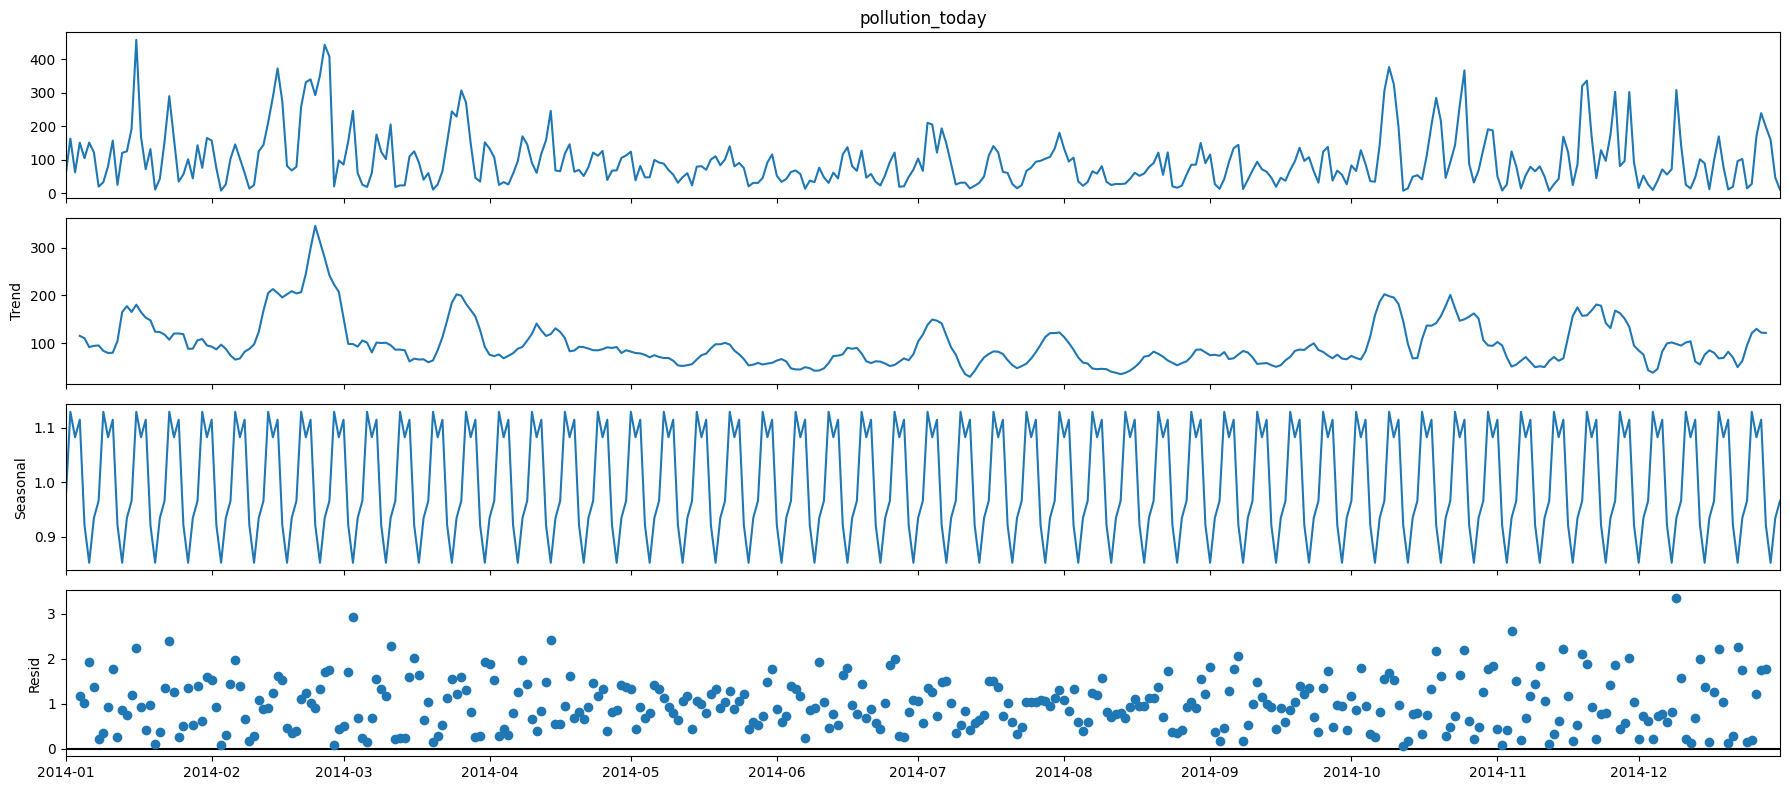

In [29]:
series = air_pollution.pollution_today[-365:]

result= seasonal_decompose(series, model='multiplicative')
result.plot()

**Resampling**

In [31]:
resample = air_pollution.resample('W')
weekly_mean = resample.mean()
weekly_mean

pollution_today        dew
date                                  
2010-01-03       112.395833  -9.312500
2010-01-10        74.452381 -19.976190
2010-01-17        86.708333 -18.083333
2010-01-24       115.377451 -14.202381
2010-01-31        64.824930 -17.744048
...                     ...        ...
2014-12-07        37.654762 -19.458333
2014-12-14       101.089286 -14.327381
2014-12-21        67.702381 -16.232143
2014-12-28       120.648810 -12.017857
2015-01-04        71.708333 -16.013889

[262 rows x 2 columns]

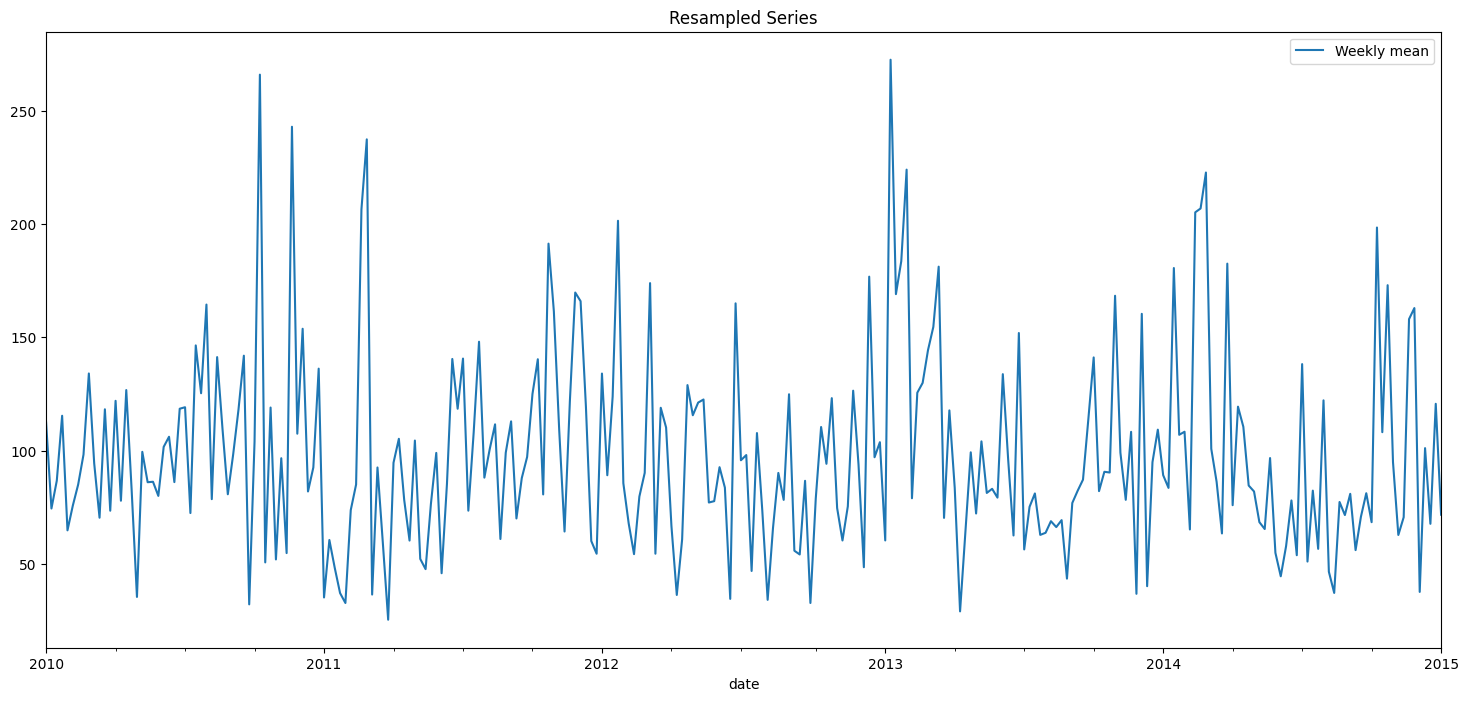

In [32]:
weekly_mean.pollution_today.plot(label='Weekly mean')
plt.title("Resampled Series")
plt.legend()
plt.show()

In [34]:
resample1 = air_pollution.resample('M')
monthly_mean = resample1.mean()
monthly_mean.head()

pollution_today        dew
date                                  
2010-01-31        87.144444 -16.955556
2010-02-28        98.264137 -13.156250
2010-03-31        98.886425  -7.955645
2010-04-30        79.884722  -3.330556
2010-05-31        86.910618   7.651882

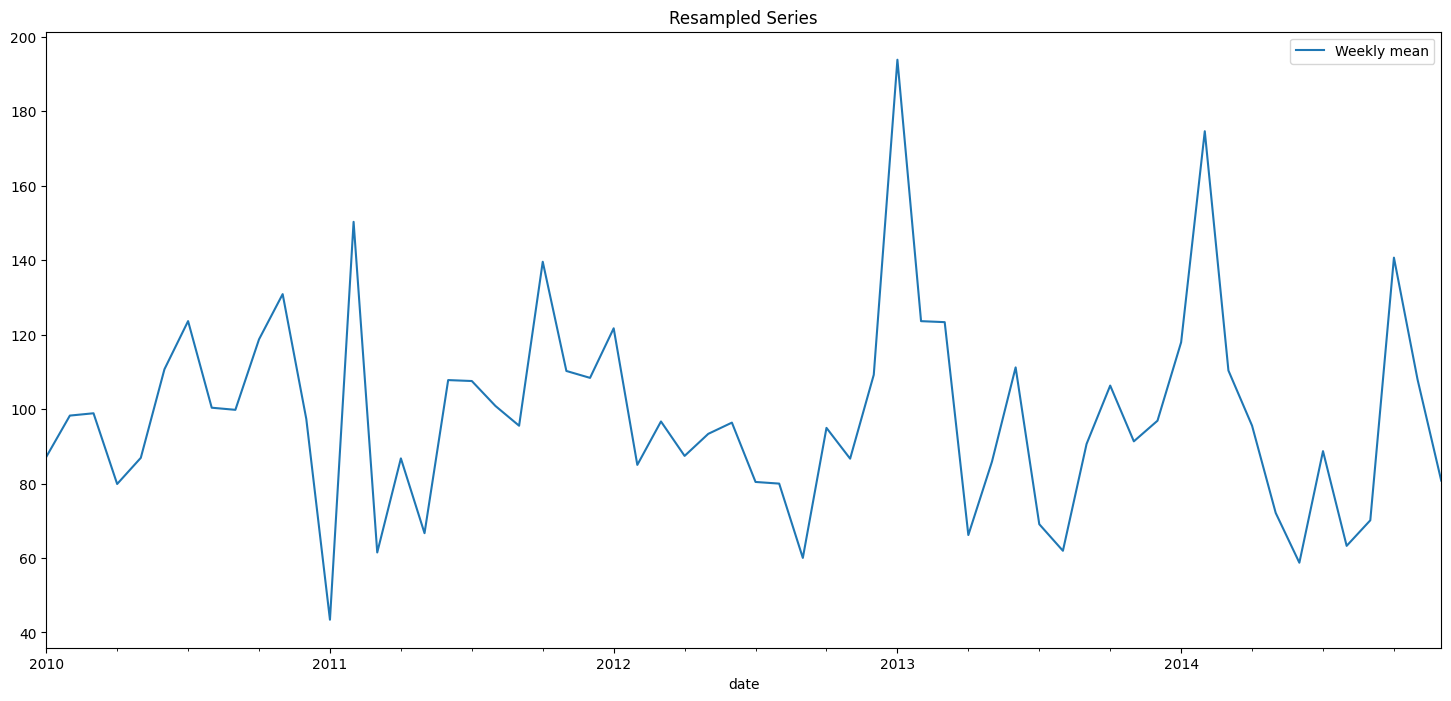

In [36]:
monthly_mean.pollution_today.plot(label='Weekly mean')
plt.title("Resampled Series")
plt.legend()
plt.show()

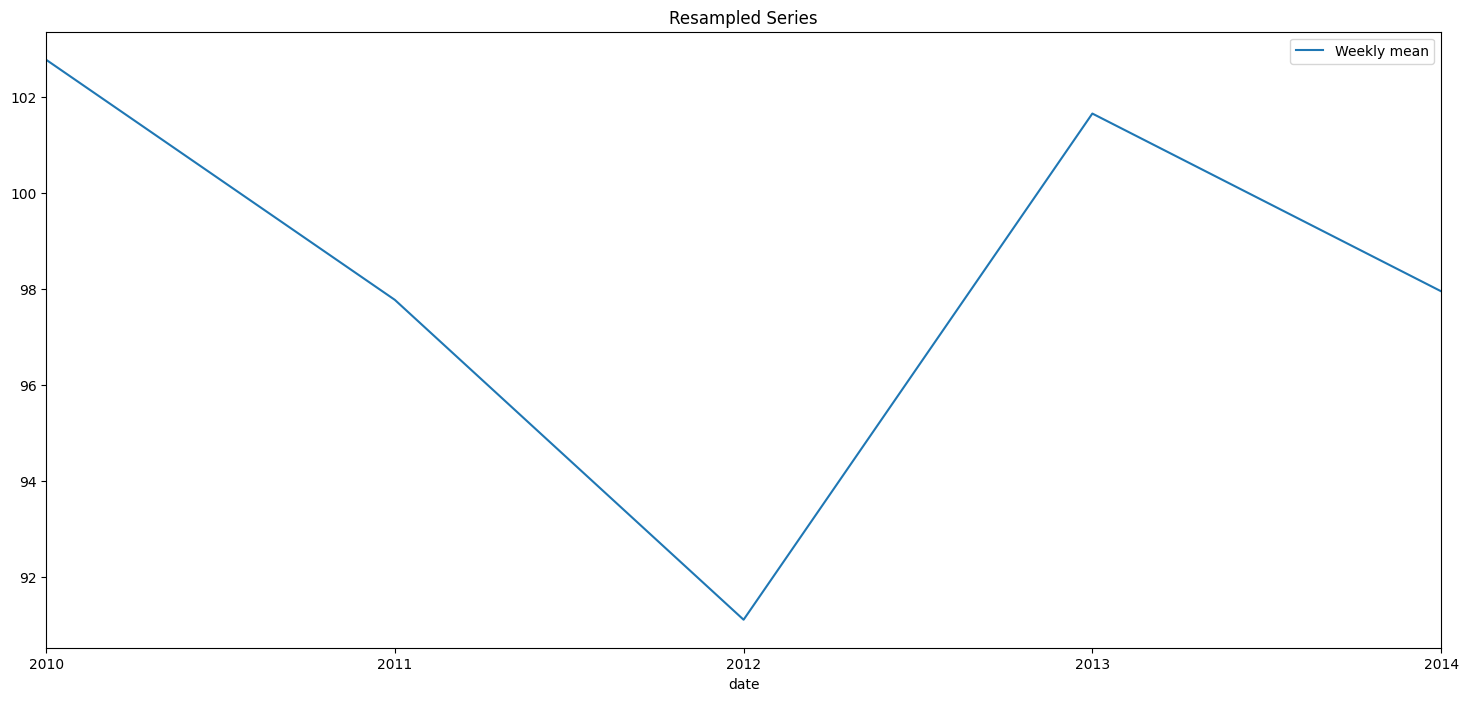

In [38]:
resample2 = air_pollution.resample('Y')
annual_mean = resample2.mean()

annual_mean.pollution_today.plot(label='Weekly mean')
plt.title("Resampled Series")
plt.legend()
plt.show()

# Noise in Automatic Time Series Decomposition

**Noise**

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

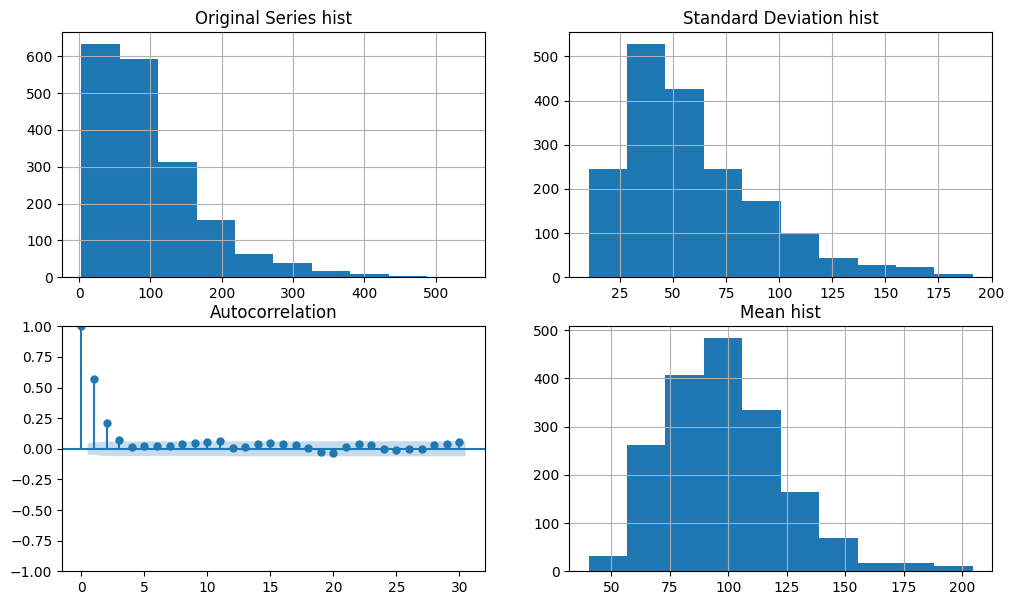

In [43]:
fig = plt.figure(figsize=(12,7))
layout=(2,2)

hist_ax=plt.subplot2grid(layout,(0,0))
ac_ax=plt.subplot2grid(layout,(1,0))
hist_std_ax=plt.subplot2grid(layout,(0,1))
mean_ax=plt.subplot2grid(layout,(1,1))

air_pollution.pollution_today.hist(ax=hist_ax)
hist_ax.set_title("Original Series hist")


plot_acf(air_pollution.pollution_today, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = air_pollution.pollution_today.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard Deviation hist")

mm = air_pollution.pollution_today.rolling(30).mean()
mm.hist(ax=mean_ax)
mean_ax.set_title("Mean hist")

plt.show()

# Feature Engineering and Stationarity in Time Series



**numerical transformations**


In [48]:
for col in air_pollution:
    air_pollution[col]= np.round(air_pollution[col], decimals=3)

In [49]:
air_pollution

pollution_today     dew
date                               
2010-01-02          145.958  -8.500
2010-01-03           78.833 -10.125
2010-01-04           31.333 -20.875
2010-01-05           42.458 -24.583
2010-01-06           56.417 -23.708
...                     ...     ...
2014-12-27          238.667  -9.667
2014-12-28          197.375 -10.792
2014-12-29          159.000 -12.333
2014-12-30           46.083 -13.917
2014-12-31           10.042 -21.792

[1825 rows x 2 columns]

**extracting parts of a date**


In [50]:
air_pollution.reset_index(inplace=True)
air_pollution.head()

date  pollution_today     dew
0 2010-01-02          145.958  -8.500
1 2010-01-03           78.833 -10.125
2 2010-01-04           31.333 -20.875
3 2010-01-05           42.458 -24.583
4 2010-01-06           56.417 -23.708

In [51]:
air_pollution['day']= air_pollution['date'].dt.day
air_pollution['month']= air_pollution['date'].dt.month
air_pollution['year']= air_pollution['date'].dt.year
air_pollution.set_index('date', inplace= True)

air_pollution

pollution_today     dew  day  month  year
date                                                 
2010-01-02          145.958  -8.500    2      1  2010
2010-01-03           78.833 -10.125    3      1  2010
2010-01-04           31.333 -20.875    4      1  2010
2010-01-05           42.458 -24.583    5      1  2010
2010-01-06           56.417 -23.708    6      1  2010
...                     ...     ...  ...    ...   ...
2014-12-27          238.667  -9.667   27     12  2014
2014-12-28          197.375 -10.792   28     12  2014
2014-12-29          159.000 -12.333   29     12  2014
2014-12-30           46.083 -13.917   30     12  2014
2014-12-31           10.042 -21.792   31     12  2014

[1825 rows x 5 columns]

#  Stationarity in Time Series  

#  Augmented Dickey-Fuller test for Stationarity in Time Series  


**Augmented Dickey-Fuller test**


In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
X = air_pollution.pollution_today.values

In [5]:
result = adfuller(X)
result

(-10.116719049694126,
 9.680895036319216e-18,
 12,
 1812,
 {'1%': -3.4339640110318004,
  '5%': -2.8631363845692475,
  '10%': -2.567619862152732},
 19973.537007112544)

In [6]:
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -10.116719
p value 0.000000
critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# How to Make any time series a Stationary Time Series

In [ ]:
passengers = pd.read_csv("datasets/international_airline_passengers.csv")

In [55]:
passengers.head()

time  passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [56]:
result = adfuller(passengers['passengers'])

In [57]:
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: 0.815369
p value 0.991880
critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


perché cacchio scrive log se fa sqrt?????????????????

In [58]:
df_log = np.sqrt(passengers['passengers'])
df_diff = df_log.diff().dropna()

In [59]:
result = adfuller(df_diff)
print('ADF Statistics: %f'% result[0])
print('p value %f'% result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -3.186422
p value 0.020784
critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
